<a href="https://colab.research.google.com/github/Gowthampeter/Data-science/blob/main/bank_fraud_prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [4]:
data = pd.read_csv('bs140513_032310.csv.zip')

In [5]:
data.head(20)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
5,0,'C1315400589','3','F','28007','M348934600','28007','es_transportation',25.81,0
6,0,'C765155274','1','F','28007','M348934600','28007','es_transportation',9.10,0
7,0,'C202531238','4','F','28007','M348934600','28007','es_transportation',21.17,0
8,0,'C105845174','3','M','28007','M348934600','28007','es_transportation',32.40,0
9,0,'C39858251','5','F','28007','M348934600','28007','es_transportation',35.40,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


'F'    324565
'M'    268385
'E'      1178
'U'       515
Name: gender, dtype: int64


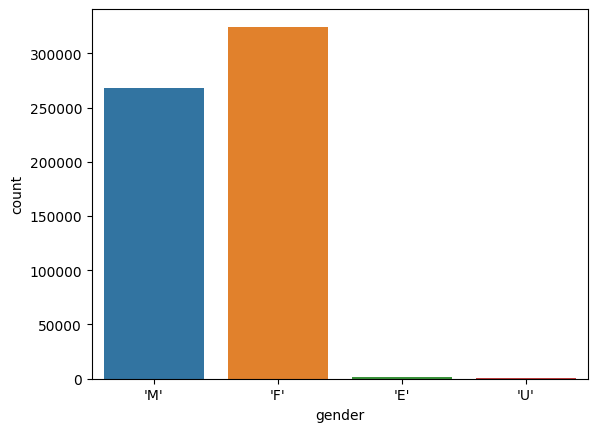

In [7]:
print(data.gender.value_counts())
ax = sns.countplot(data = data,x='gender')
plt.show()

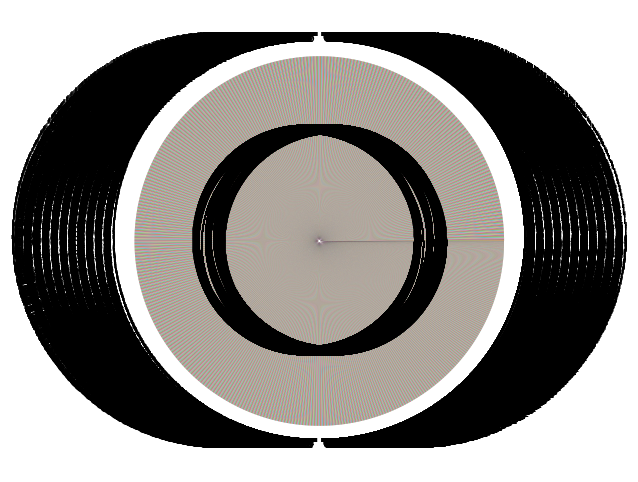

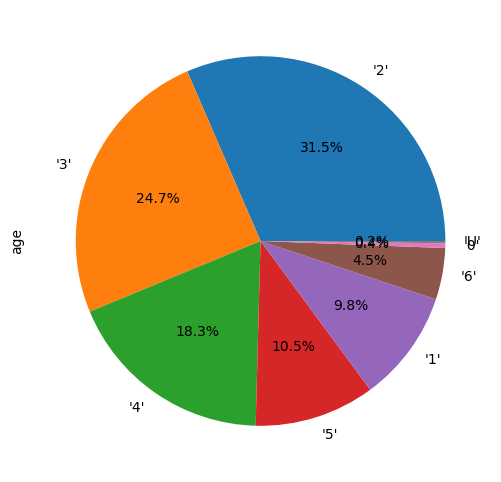

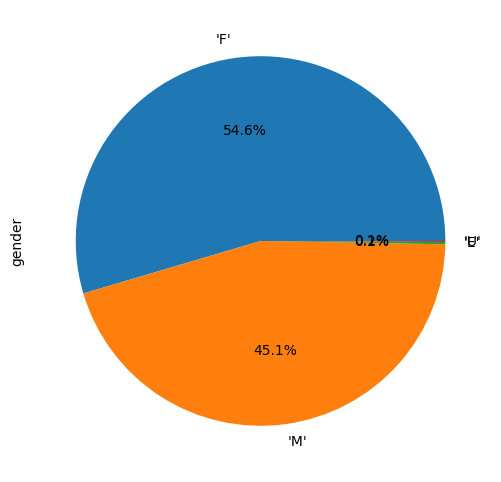

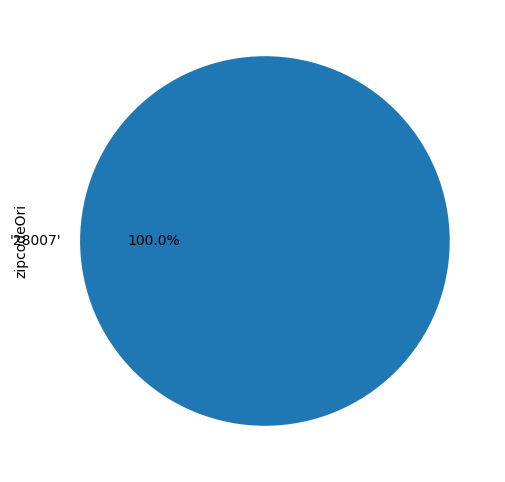

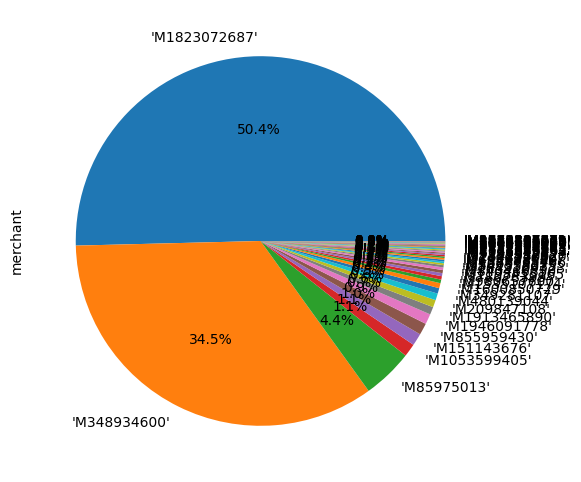

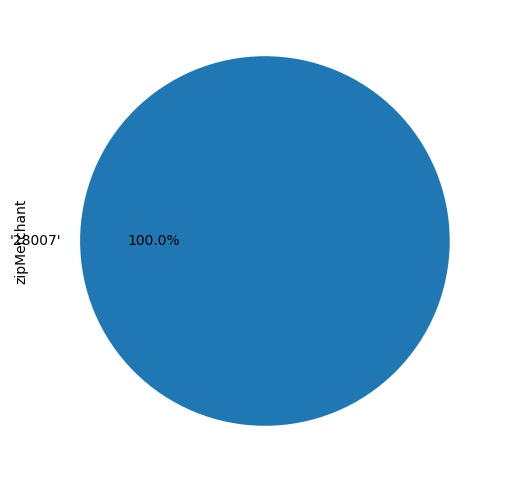

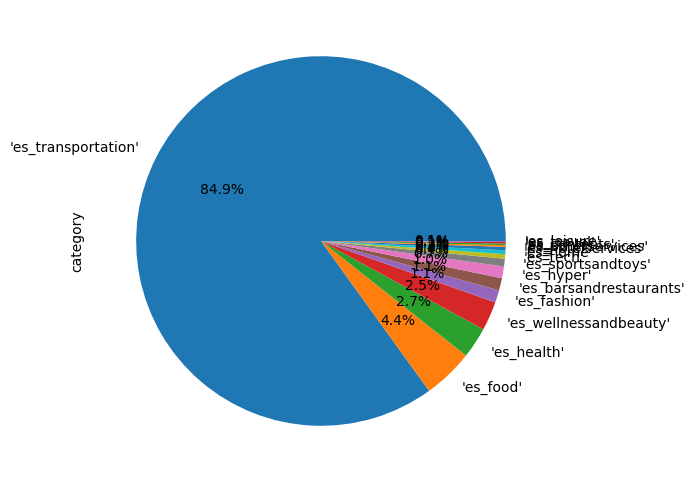

In [8]:
for i in data.select_dtypes(exclude = np.number).columns:
    data[i].value_counts().plot.pie(subplots = True , figsize = (11,6),autopct = '%1.1f%%')
    plt.show()

In [9]:
data['category'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 594643 entries, 0 to 594642
Series name: category
Non-Null Count   Dtype 
--------------   ----- 
594643 non-null  object
dtypes: object(1)
memory usage: 4.5+ MB


In [ ]:
for i in data.select_dtypes(exclude = np.number).columns:
    f,ax = plt.subplots(1,2,figsize=(6,10))
    data[i].value_counts().plot.pie(ax = ax[0],subplots = True , figsize = (11,8),autopct = '%1.1f%%')
    sns.countplot(x='fraud',hue = i, data = data,ax = ax[1])
    plt.show()

In [11]:
data.groupby('category')['amount','fraud'].mean()

<ipython-input-11-6bf58d6c414e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('category')['amount','fraud'].mean()


,amount,fraud
category,,
'es_barsandrestaurants',43.461014,0.018829
'es_contents',44.547571,0.000000
'es_fashion',65.666642,0.017973
'es_food',37.070405,0.000000
'es_health',135.621367,0.105126
'es_home',165.670846,0.152064
'es_hotelservices',205.614249,0.314220
'es_hyper',45.970421,0.045917
'es_leisure',288.911303,0.949900


In [12]:
data.groupby('age')['amount','fraud'].mean()

<ipython-input-12-4b9f9a9b345d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('age')['amount','fraud'].mean()


,amount,fraud
age,,
'0',46.602896,0.019576
'1',37.530909,0.011853
'2',38.358458,0.012514
'3',37.879718,0.011928
'4',38.201522,0.012933
'5',36.426231,0.010951
'6',36.865624,0.009748
'U',36.627623,0.005942


In [13]:
#class imbalance in target - can use smote to overcome class imbalance
#Even though there was an less transcation in fradulent transaction but the amount of fradulent transcation was more
#In leisure, travel, xsports and hotel services fraud amount was more
#Age interval 3(36-40) has more fraud amount followed by 4(41-45), 2(31-35)
#Gender male has gone through fraudlent transcation

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [16]:
#since the zipCodeOri zipMerchant are unique values, dropping these column from the data

In [22]:
data_ = data.drop(['zipcodeOri','zipMerchant'],axis=1)

In [23]:
data_

,step,customer,age,gender,merchant,category,amount,fraud
0,0,'C1093826151','4','M','M348934600','es_transportation',4.55,0
1,0,'C352968107','2','M','M348934600','es_transportation',39.68,0
2,0,'C2054744914','4','F','M1823072687','es_transportation',26.89,0
3,0,'C1760612790','3','M','M348934600','es_transportation',17.25,0
4,0,'C757503768','5','M','M348934600','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','M1823072687','es_transportation',20.53,0
594639,179,'C650108285','4','F','M1823072687','es_transportation',50.73,0
594640,179,'C123623130','2','F','M349281107','es_fashion',22.44,0
594641,179,'C1499363341','5','M','M1823072687','es_transportation',14.46,0


In [24]:
col_categorical = data_.select_dtypes(include= ['object']).columns
for col in col_categorical:
    data_[col] = data_[col].astype('category')
data_[col_categorical] = data_[col_categorical].apply(lambda x: x.cat.codes)
data_.head(5)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0


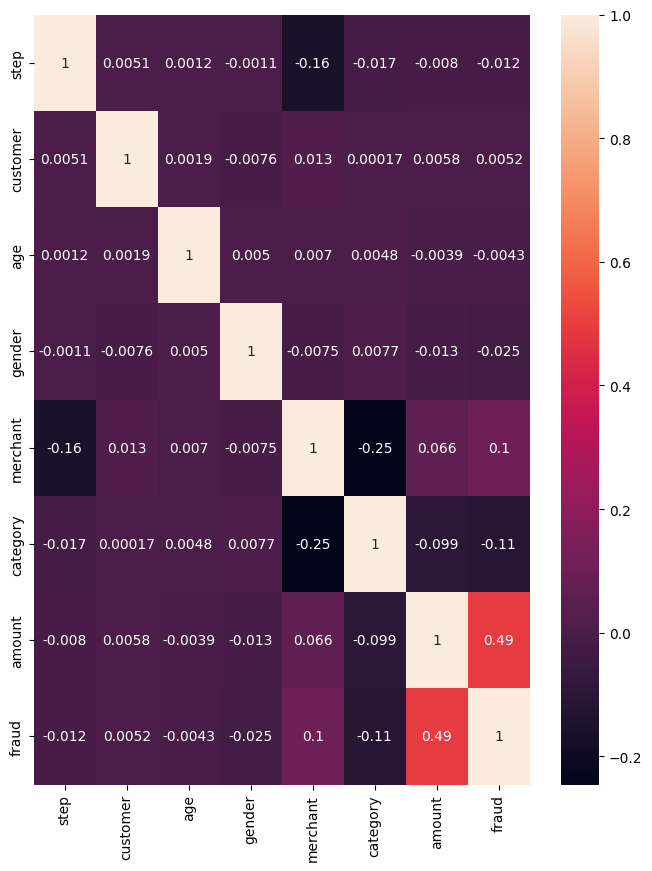

In [28]:
plt.figure(figsize = (8,8))
ax = sns.heatmap(data_.corr(), annot = True) 
plt.show()

In [85]:
X = data_.drop(['fraud'],axis = 1)
y = data_['fraud']

In [86]:
y[y==1].count()

7200

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify = y, random_state = 24)

In [88]:
knn = KNeighborsClassifier(n_neighbors=5,p=1)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)


print("Classification Report for K-Nearest Neighbours: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of K-Nearest Neigbours: \n", confusion_matrix(y_test,y_pred))


Classification Report for K-Nearest Neighbours: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    117489
           1       0.86      0.61      0.71      1440

    accuracy                           0.99    118929
   macro avg       0.93      0.80      0.85    118929
weighted avg       0.99      0.99      0.99    118929

Confusion Matrix of K-Nearest Neigbours: 
 [[117341    148]
 [   562    878]]


In [96]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 24)

x_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [97]:
x_train_smote

,step,customer,age,gender,merchant,category,amount
0,170,2837,6,1,30,12,1.060000
1,82,2797,2,1,31,8,495.299804
2,164,3055,3,1,12,10,347.130397
3,32,519,2,2,46,10,448.233166
4,111,2759,6,1,30,12,50.450000
...,...,...,...,...,...,...,...
939903,108,2187,2,1,12,10,285.798898
939904,15,2915,3,1,2,13,105.339504
939905,37,3953,2,1,18,12,11.240000
939906,158,2184,2,1,18,8,242.432032


In [98]:
y_train_smote

,fraud
0,0
1,1
2,1
3,1
4,0
...,...
939903,1
939904,1
939905,0
939906,1


In [99]:
smote_data = x_train_smote.copy()

In [100]:
smote_data['target'] = y_train_smote

In [101]:
smote_data['target'].value_counts()

0    469954
1    469954
Name: target, dtype: int64

In [102]:
smote_data.loc[smote_data['target'] == 1]

,step,customer,age,gender,merchant,category,amount,target
1,82,2797,2,1,31,8,495.299804,1
2,164,3055,3,1,12,10,347.130397,1
3,32,519,2,2,46,10,448.233166,1
6,69,1646,4,1,40,6,170.541591,1
7,117,2283,1,1,43,9,272.348228,1
...,...,...,...,...,...,...,...,...
939900,77,1005,4,2,23,7,501.615626,1
939902,177,3155,3,1,34,4,475.840603,1
939903,108,2187,2,1,12,10,285.798898,1
939904,15,2915,3,1,2,13,105.339504,1


In [103]:
knn = KNeighborsClassifier(n_neighbors=5,p=1)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)


print("Classification Report for K-Nearest Neighbours: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of K-Nearest Neigbours: \n", confusion_matrix(y_test,y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report for K-Nearest Neighbours: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    117489
           1       0.98      1.00      0.99    117489

    accuracy                           0.99    234978
   macro avg       0.99      0.99      0.99    234978
weighted avg       0.99      0.99      0.99    234978

Confusion Matrix of K-Nearest Neigbours: 
 [[114877   2612]
 [   178 117311]]
